In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix 

In [2]:
df=pd.read_csv("mail_data.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.replace({"Category":{'spam':0,'ham':1}},inplace=True)

In [6]:
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [12]:
new_df=df.rename(columns={'Message':'X','Category':'Y'})


In [13]:
new_df

,Y,X
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [15]:
X=new_df['X']
Y=new_df['Y']

F:\Nouveau dossier\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y', ylabel='count'>

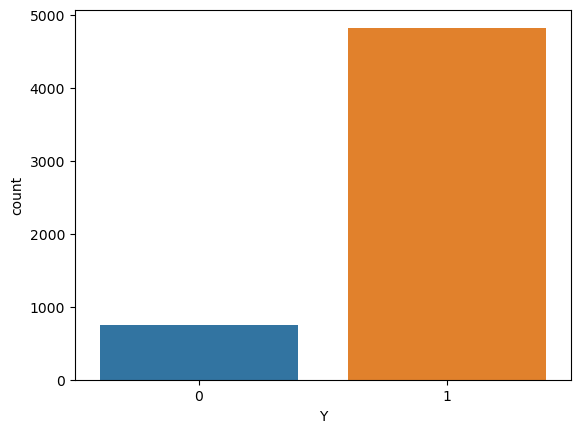

In [18]:
import seaborn as sns
sns.countplot(Y)

([<matplotlib.patches.Wedge at 0x1b96a45bac0>,
 [Text(-0.44951399273771386, 1.003960741430161, 'spam'),
  Text(0.4495139927377133, -1.0039607414301615, 'ham')],
 [Text(-0.24518945058420755, 0.5476149498709969, '13.4%'),
  Text(0.24518945058420724, -0.547614949870997, '86.6%')])

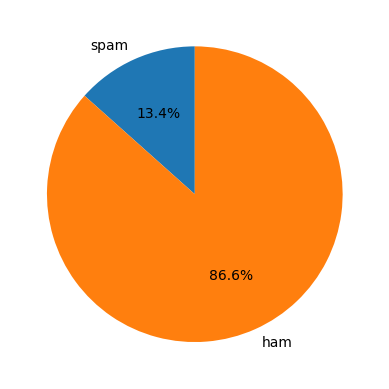

In [21]:
labels=['spam' ,'ham']
sizes = [13.4, 86.6]

plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

X=new_df['X'].str.lower()

vectorizer = TfidfVectorizer()

X= vectorizer.fit_transform(X)


In [40]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()


In [41]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
x_train_prediction=model.predict(x_train)
print(x_train_prediction)
accuracy1=accuracy_score(y_train,x_train_prediction)
print(accuracy1)

[1 1 1 ... 1 1 1]
1.0


In [47]:
x_test_prediction=model.predict(x_test)
print(x_test_prediction)
accuracy2=accuracy_score(y_test,x_test_prediction)
print(accuracy2)

[1 1 1 ... 1 1 1]
0.9739910313901345


In [65]:
rfc = RandomForestClassifier(random_state=4)
rfc.fit(x_train,y_train)
y_train_pred = rfc.predict(x_train)
y_train_prob = rfc.predict_proba(x_train)[:,1]
y_train_prob

array([1.  , 1.  , 0.97, ..., 0.97, 1.  , 1.  ])

In [66]:
confusion_matrix(y_train,y_train_pred)

array([[ 589,    0],
       [   0, 3868]], dtype=int64)

In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_train_prob)

1.0

In [68]:
rfc = RandomForestClassifier(random_state=4)
rfc.fit(x_train,y_train)
y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]
y_test_prob

array([0.99, 1.  , 1.  , ..., 1.  , 1.  , 0.99])

In [70]:
confusion_matrix(y_test,y_test_pred)

array([[131,  27],
       [  2, 955]], dtype=int64)

In [71]:
roc_auc_score(y_test, y_test_prob)

0.9890315199132309

In [83]:
new_samples = ["hey how are you doing ?? ", " Subject: Congratulations! You've Won a Grand Prize!Dear [Your Name],We are thrilled to inform you that you have been selected as the grand prize winner of our exclusive sweepstakes! You have won a luxurious vacation for two to an exotic destination, a brand-new car, and $10,000 in cash!To claim your prizes, simply click on the link below and provide us with your personal details for verification purposes.[Malicious Link]Don't miss out on this once-in-a-lifetime opportunity! Act now to claim your incredible prizes.Sincerely,[Scam Company NameCustomer Service Team "]

new_samples_vector = vectorizer.transform(new_samples)

#predictions = rfc.predict(new_samples_vector)